In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from sklearn.svm  import SVR
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve, GridSearchCV,learning_curve

In [2]:
df = pd.read_csv('brief_assurance_clean.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   sex_male          1338 non-null   int64  
 6   smoker_no         1338 non-null   int64  
 7   smoker_yes        1338 non-null   int64  
 8   region_northeast  1338 non-null   int64  
 9   region_northwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [4]:
df.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [6]:
df = df.drop(['sex_male','smoker_no'],axis=1)

In [7]:
X = df.drop('charges', axis=1)

y = df['charges']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)


In [9]:
cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()

0.7475171503485283

In [10]:
cross_val_score(Lasso(),X_train,y_train,cv=5).mean()

0.7475234885052464

In [13]:
cross_val_score(Ridge(),X_train,y_train,cv=5).mean()


0.3995281083387251

In [12]:
cross_val_score(ElasticNet(),X_train,y_train,cv=5).mean()

0.3995281083387251

nous obtenons le meilleur resultat avec methode lasso

rechercher meileur score avec  standardscaler()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled



array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
cross_val_score(Lasso(),X_train,y_train,cv=5).mean()

0.7536286749384689

In [ ]:
cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()

0.7535159348506911

nous obtenons un meilleur score avec standarlistaion des dataframe 

In [ ]:
model=Lasso()
param_grid={'alpha':np.arange(1,50)/10
            }

grid=GridSearchCV(Lasso(),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [ ]:
grid.best_score_

0.7536562442800779

In [ ]:
grid.best_params_

{'alpha': 4.9}

nous obtenons le meilleur resultat sans standarlisation lisation avec lasso ,alfpha = 4.9, resultat 0.747690283954682
nous obtenons le meilleur resultat avec  standarlisation lisation avec lasso ,alfpha = 4.9, resultat 0.7536562442800779

In [ ]:
model=ElasticNet()
param_grid={'alpha':np.arange(1,50)/10,
            'l1_ratio':np.arange(1,50)/10
            }

grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9555 fits failed out of a total of 12005.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py", line 895, in fit
    self._validate_params()
  File "/Users/leonzhang/miniconda3/envs/dataanalyse_env/

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [ ]:
grid.best_score_

0.7537158074036721

In [ ]:
grid.best_params_

{'alpha': 0.2, 'l1_ratio': 0.9}

confiration meilleur model est lasso avec l1ration = 1.0
avec standarlisation {'alpha': 0.2, 'l1_ratio': 0.9} le meilleur score est 0.7537158074036721



In [ ]:
N,train_score,val_score =learning_curve(Lasso(alpha=4.9),X_train,y_train,train_sizes= np.linspace(0.2,1.0,5) ,cv=5)
print(N)

[171 342 513 684 856]


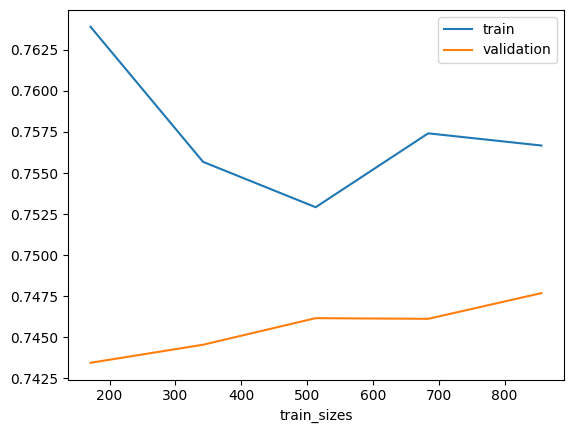

In [ ]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel("train_sizes")
plt.legend()

In [ ]:
model=Lasso(alpha=4.9)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6817788311161069

In [ ]:
model=ElasticNet(alpha= 0.2, l1_ratio= 0.9)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6822006581965528

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6830253781194382